In [101]:
# coding: utf-8
# last modified:20220824
import time
import serial
import re
import time

utctime = ''
lat = ''
ulat = ''
lon = ''
ulon = ''
numSv = ''
msl = ''
cogt = ''
cogm = ''
sog = ''
kph = ''
gps_t = 0




def Convert_to_degrees(in_data1, in_data2):
    len_data1 = len(in_data1)
    str_data2 = "%05d" % int(in_data2)
    temp_data = int(in_data1)
    symbol = 1
    if temp_data < 0:
        symbol = -1
    degree = int(temp_data / 100.0)
    str_decimal = str(in_data1[len_data1-2]) + str(in_data1[len_data1-1]) + str(str_data2)
    f_degree = int(str_decimal)/60.0/100000.0
    # print("f_degree:", f_degree)
    if symbol > 0:
        result = degree + f_degree
    else:
        result = degree - f_degree
    return result


def GPS_read(ser):
        global utctime
        global lat
        global ulat
        global lon
        global ulon
        global numSv
        global msl
        global cogt
        global cogm
        global sog
        global kph
        global gps_t
        if ser.inWaiting():
            if ser.read(1) == b'G':
                if ser.inWaiting():
                    if ser.read(1) == b'N':
                        if ser.inWaiting():
                            choice = ser.read(1)
                            if choice == b'G':
                                if ser.inWaiting():
                                    if ser.read(1) == b'G':
                                        if ser.inWaiting():
                                            if ser.read(1) == b'A':
                                                #utctime = ser.read(7)
                                                GGA = ser.read(70)
                                                GGA_g = re.findall(r"\w+(?=,)|(?<=,)\w+", str(GGA))
                                                # print(GGA_g)
                                                if len(GGA_g) < 13:
                                                    print("GPS no found")
                                                    # kph = (kph + 1) % 17
                                                    # time.sleep(2)
                                                    gps_t = 0
                                                    return 0
                                                else:
                                                    utctime = GGA_g[0]
                                                    # lat = GGA_g[2][0]+GGA_g[2][1]+'°'+GGA_g[2][2]+GGA_g[2][3]+'.'+GGA_g[3]+'\''
                                                    lat = "%.8f" % Convert_to_degrees(str(GGA_g[2]), str(GGA_g[3]))
                                                    ulat = GGA_g[4]
                                                    # lon = GGA_g[5][0]+GGA_g[5][1]+GGA_g[5][2]+'°'+GGA_g[5][3]+GGA_g[5][4]+'.'+GGA_g[6]+'\''
                                                    lon = "%.8f" % Convert_to_degrees(str(GGA_g[5]), str(GGA_g[6]))
                                                    ulon = GGA_g[7]
                                                    numSv = GGA_g[9]
                                                    msl = GGA_g[12]+'.'+GGA_g[13]+GGA_g[14]
                                                    #print(GGA_g)
                                                    gps_t = 1
                                                    return 1
                            elif choice == b'V':
                                if ser.inWaiting():
                                    if ser.read(1) == b'T':
                                        if ser.inWaiting():
                                            if ser.read(1) == b'G':
                                                if gps_t == 1:
                                                    VTG = ser.read(40)
                                                    VTG_g = re.findall(r"\w+(?=,)|(?<=,)\w+", str(VTG))
                                                    cogt = VTG_g[0]+'.'+VTG_g[1]+'T'
                                                    if VTG_g[3] == 'M':
                                                        cogm = '0.00'
                                                        sog = VTG_g[4]+'.'+VTG_g[5]
                                                        kph = VTG_g[7]+'.'+VTG_g[8]
                                                    elif VTG_g[3] != 'M':
                                                        cogm = VTG_g[3]+'.'+VTG_g[4]
                                                        sog = VTG_g[6]+'.'+VTG_g[7]
                                                        kph = VTG_g[9]+'.'+VTG_g[10]
                                                #print(kph)


def GPS_run(ser):
    if ser.isOpen():
        print("GPS Serial Opened! Baudrate=9600")
    else:
        print("GPS Serial Open Failed!")

    try:
        while True:
            if GPS_read(ser):
                
                print("*********************")
                print('UTC Time:'+utctime)
                print('Latitude:'+lat+ulat)
                print('Longitude:'+lon+ulon)
                print('Number of satellites:'+numSv)
                print('Altitude:'+msl)
                print('True north heading:'+cogt+'°')
                print('Magnetic north heading:'+cogm+'°')
                print('Ground speed:'+sog+'Kn')
                print('Ground speed:'+kph+'Km/h')
                print("*********************")
                time.sleep(1)  

    except KeyboardInterrupt:
        ser.close()
        print("GPS serial Close!")

# if __name__ == "__main__":
#     # ser = serial.Serial("/dev/ttyUSB0", 9600)
#     ser = serial.Serial("COM6", 115200)

#     if ser.isOpen():
#         print("GPS Serial Opened! Baudrate=9600")
#     else:
#         print("GPS Serial Open Failed!")

#     try:
#         while True:
#             if GPS_read(ser):
#                 print("*********************")
#                 print('UTC Time:'+utctime)
#                 print('Latitude:'+lat+ulat)
#                 print('Longitude:'+lon+ulon)
#                 print('Number of satellites:'+numSv)
#                 print('Altitude:'+msl)
#                 print('True north heading:'+cogt+'°')
#                 print('Magnetic north heading:'+cogm+'°')
#                 print('Ground speed:'+sog+'Kn')
#                 print('Ground speed:'+kph+'Km/h')
#                 print("*********************")
#                 time.sleep(1)
#     except KeyboardInterrupt:
#         ser.close()
#         print("GPS serial Close!")

In [102]:
import os

coordinates = []
with open('dataset/4.txt') as f:
    for line in enumerate(f):
        GGA = str(line)
        if GGA.find('GNGGA') == -1:
            continue
        GGA_g = re.findall(r"\w+(?=,)|(?<=,)\w+", GGA)
        GGA_g = GGA_g[2:]
        utctime = GGA_g[0]
        # lat = GGA_g[2][0]+GGA_g[2][1]+'°'+GGA_g[2][2]+GGA_g[2][3]+'.'+GGA_g[3]+'\''
        lat = "%.8f" % Convert_to_degrees(str(GGA_g[2]), str(GGA_g[3]))
        ulat = GGA_g[4]
        # lon = GGA_g[5][0]+GGA_g[5][1]+GGA_g[5][2]+'°'+GGA_g[5][3]+GGA_g[5][4]+'.'+GGA_g[6]+'\''
        lon = "%.8f" % Convert_to_degrees(str(GGA_g[5]), str(GGA_g[6]))
        ulon = GGA_g[7]
        numSv = GGA_g[9]
        msl = GGA_g[12]+'.'+GGA_g[13]+GGA_g[14]
        #print(GGA_g)
        gps_t = 1
        coordinates.append((float(lat), float(lon)))
    
coordinates = np.array(coordinates)

In [103]:
def display():
    print("********************")
    print('UTC Time:'+utctime)
    print('Latitude:'+lat+ulat)
    print('Longitude:'+lon+ulon)
    print('Number of satellites:'+numSv)
    print('Altitude:'+msl)
    print('True north heading:'+cogt+'°')
    print('Magnetic north heading:'+cogm+'°')
    print('Ground speed:'+sog+'Kn')
    print('Ground speed:'+kph+'Km/h')
    print("*********************")

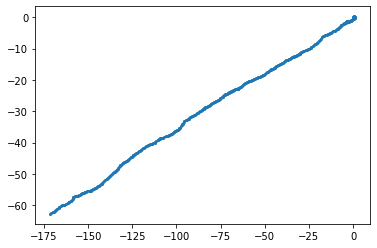

In [104]:
import matplotlib.pyplot as plt
import numpy as np

def plot_trajectory(coordinates):
    # 定义绘图区域和坐标轴范围
    # fig, ax = plt.subplots()
    # ax.set_xlim(min(coordinates[:, 0]), max(coordinates[:, 0]))
    # ax.set_ylim(min(coordinates[:, 1]), max(coordinates[:, 1]))

    # 将经纬度坐标转换为平面坐标
    lat0, lon0 = coordinates[0]
    x0, y0 = 0, 0
    xs, ys = [x0], [y0]
    for lat, lon in coordinates[1:]:
        x = (lon - lon0) * 111320 * np.cos(lat0 / 180 * np.pi)
        y = (lat - lat0) * 110574
        xs.append(x)
        ys.append(y)
        x0, y0 = x, y

    # 绘制轨迹
    plt.plot(xs, ys, 'o-', markersize=2)
    # ax.set_aspect('equal')
    # plt.show()

# 示例坐标数据

plot_trajectory(coordinates)

[[ 31.02607738 121.43933917]
 [ 31.02607717 121.43933993]
 [ 31.02607683 121.43934042]
 [ 31.02607633 121.43934057]
 [ 31.0260757  121.43934042]
 [ 31.02607498 121.43933987]
 [ 31.02607412 121.43933897]
 [ 31.02607335 121.43933762]
 [ 31.0260726  121.4393359 ]
 [ 31.02607185 121.43933392]
 [ 31.02607107 121.43933182]
 [ 31.02607025 121.43932957]
 [ 31.02606947 121.43932717]
 [ 31.02606868 121.43932456]
 [ 31.02606785 121.43932178]
 [ 31.026067   121.4393189 ]
 [ 31.02606625 121.43931618]
 [ 31.02606563 121.43931367]
 [ 31.02606515 121.4393114 ]
 [ 31.02606482 121.4393094 ]
 [ 31.02606458 121.4393076 ]
 [ 31.02606443 121.43930612]
 [ 31.02606432 121.4393049 ]
 [ 31.0260643  121.43930404]
 [ 31.0260644  121.43930349]
 [ 31.02606457 121.43930325]
 [ 31.02606473 121.43930305]
 [ 31.02606487 121.43930275]
 [ 31.02606497 121.43930237]
 [ 31.02606502 121.43930188]
 [ 31.02606502 121.43930132]
 [ 31.02606499 121.43930067]
 [ 31.0260649  121.43929995]
 [ 31.02606479 121.43929917]
 [ 31.02606465

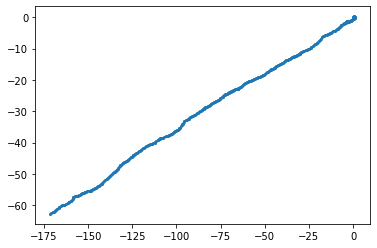

In [105]:
import numpy as np
import math

def smooth_trajectory(coordinates, filter_len=10):
    # 定义平均滤波器
    filter_kernel = np.ones(filter_len) / filter_len

    # 对横坐标和纵坐标分别进行平滑处理
    x_smooth = np.convolve(coordinates[:, 0], filter_kernel, mode='valid')
    y_smooth = np.convolve(coordinates[:, 1], filter_kernel, mode='valid')

    # 将平滑处理后的坐标合并成新的二维坐标
    coordinates_smooth = np.column_stack((x_smooth, y_smooth))

    return coordinates_smooth

# 示例坐标数据

coordinates_smooth = smooth_trajectory(coordinates, filter_len=10)
print(coordinates_smooth)
plot_trajectory(coordinates)

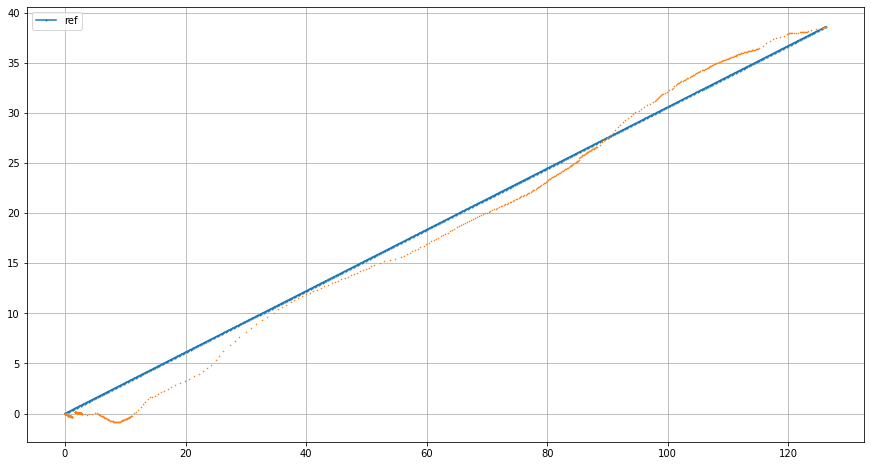

<class 'numpy.ndarray'>


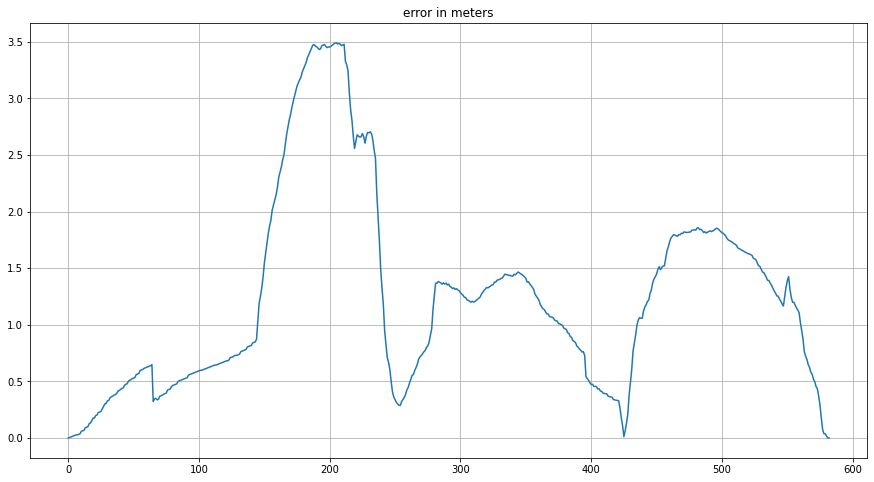

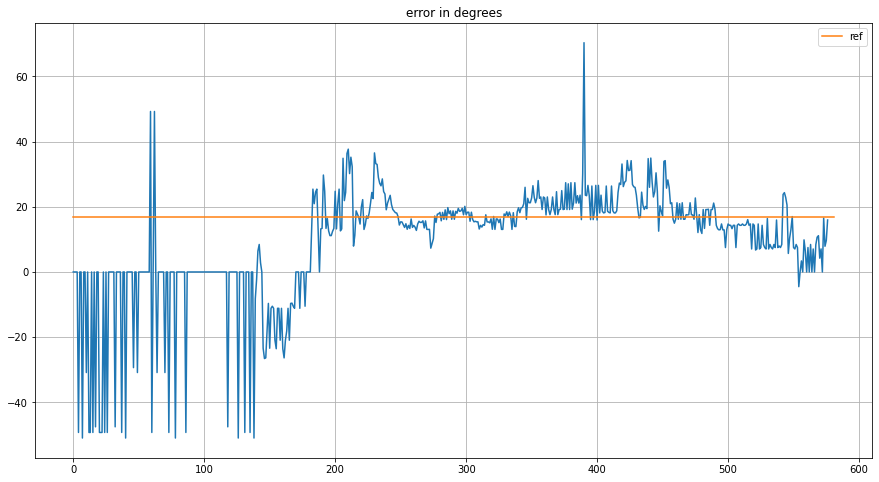

0.3056923064859101


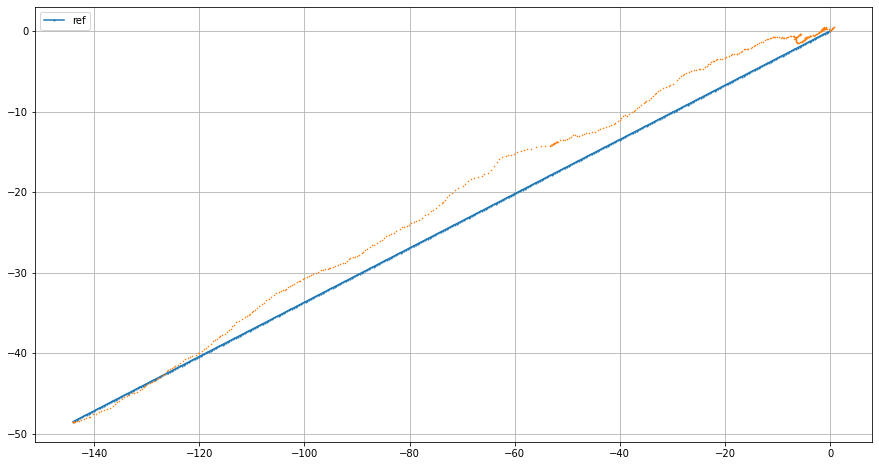

<class 'numpy.ndarray'>


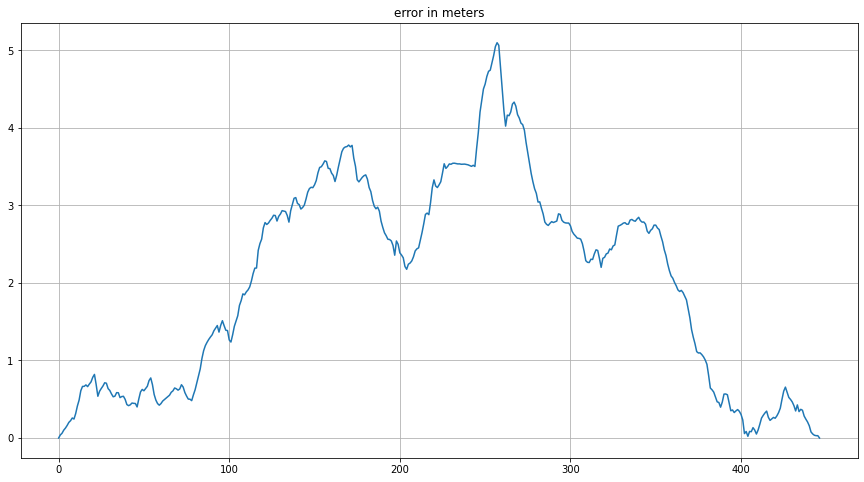

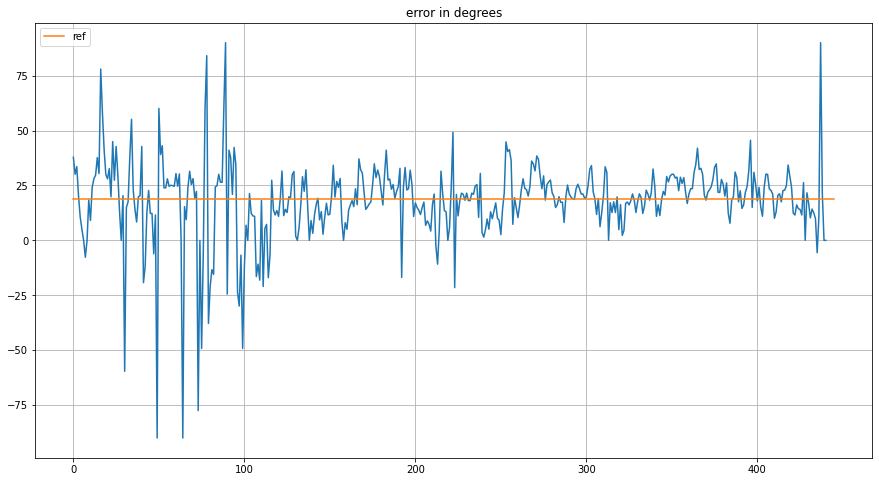

0.3368808246791771


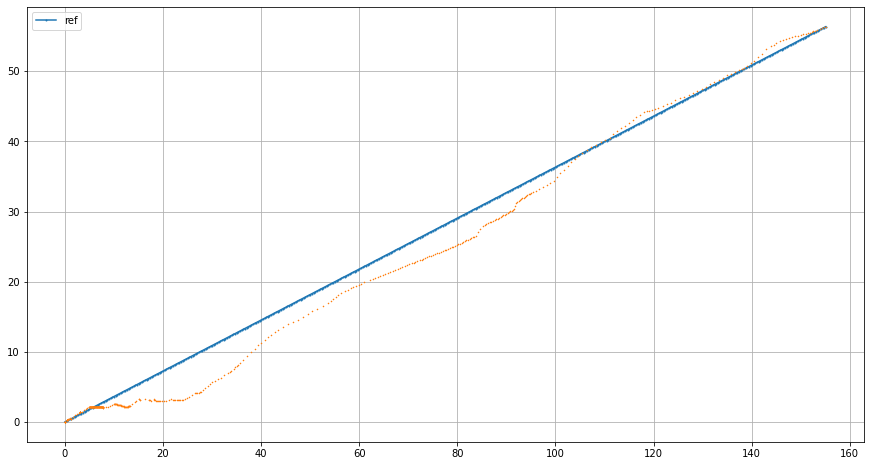

<class 'numpy.ndarray'>


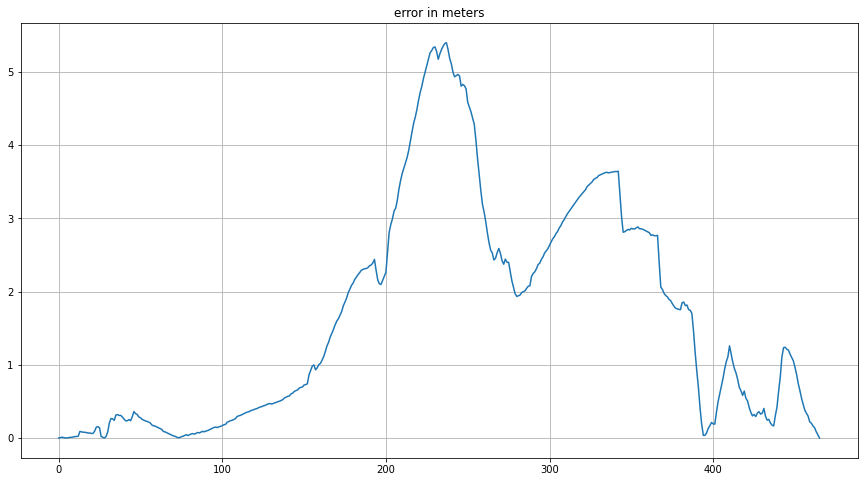

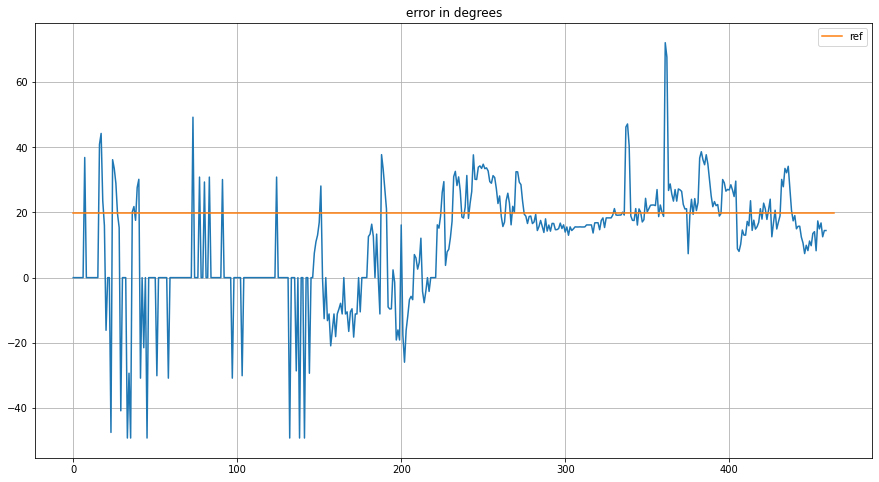

0.3632069414216912


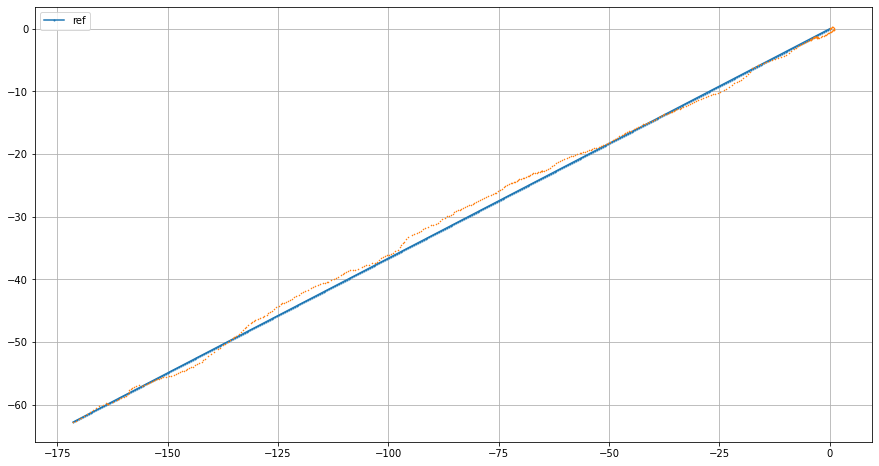

<class 'numpy.ndarray'>


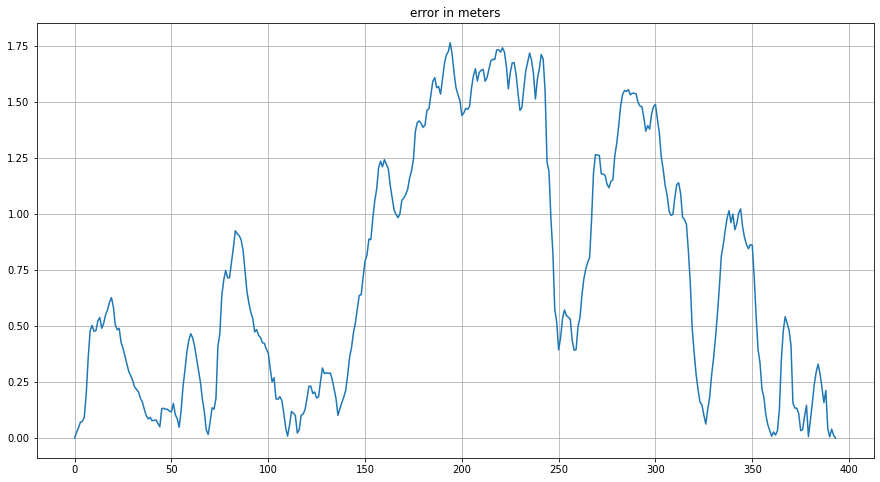

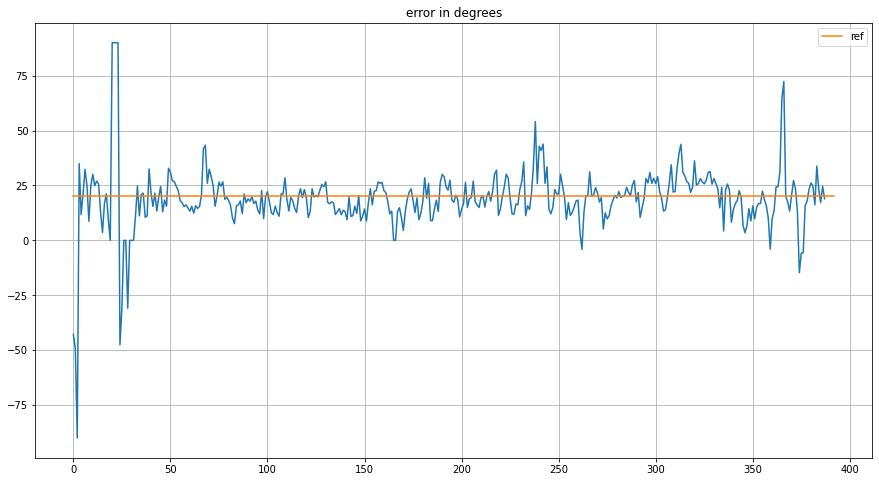

0.36619328712722743


In [107]:
import os


for i in range(1, 5):
    coordinates = []
    with open(f'dataset/{i}.txt') as f:
        for line in enumerate(f):
            GGA = str(line)
            if GGA.find('GNGGA') == -1:
                continue
            GGA_g = re.findall(r"\w+(?=,)|(?<=,)\w+", GGA)
            GGA_g = GGA_g[2:]
            utctime = GGA_g[0]
            # lat = GGA_g[2][0]+GGA_g[2][1]+'°'+GGA_g[2][2]+GGA_g[2][3]+'.'+GGA_g[3]+'\''
            lat = "%.8f" % Convert_to_degrees(str(GGA_g[2]), str(GGA_g[3]))
            ulat = GGA_g[4]
            # lon = GGA_g[5][0]+GGA_g[5][1]+GGA_g[5][2]+'°'+GGA_g[5][3]+GGA_g[5][4]+'.'+GGA_g[6]+'\''
            lon = "%.8f" % Convert_to_degrees(str(GGA_g[5]), str(GGA_g[6]))
            ulon = GGA_g[7]
            numSv = GGA_g[9]
            msl = GGA_g[12]+'.'+GGA_g[13]+GGA_g[14]
            #print(GGA_g)
            gps_t = 1
            coordinates.append((float(lat), float(lon)))
        f.close()
    coordinates = np.array(coordinates)


    lat0, lon0 = coordinates[0]
    x0, y0 = 0, 0
    xs, ys = [x0], [y0]
    for lat, lon in coordinates[1:]:
        x = (lon - lon0) * 111320 * np.cos(lat0 / 180 * np.pi)
        y = (lat - lat0) * 110574
        xs.append(x)
        ys.append(y)
        x0, y0 = x, y

    num_points = xs.__len__()
    xs, ys = np.array(xs), np.array(ys)
    lin_x, lin_y = np.linspace(xs[0], xs[-1], num_points), np.linspace(ys[0], ys[-1], num_points)
    plt.figure(figsize=[15, 8])
    plt.plot(lin_x, lin_y, 'o-', markersize=1, label = 'ref')
    plt.plot(xs, ys, '*', markersize=1)
    plt.grid()
    plt.legend()
    plt.show()

    k = float((lin_y[-1] - lin_y[0]) / (lin_x[-1] - lin_x[0]))
    b = lin_y[-1] - k * lin_x[-1]
    print(type(xs))
    dis = np.abs(k * xs - ys + b) / math.sqrt(1 + k*k)
    plt.figure(figsize=[15, 8])
    plt.plot(dis)
    plt.grid()
    plt.title('error in meters')
    plt.show()

    slope = [(ys[i] - ys[i-1]) / (xs[i] - xs[i-1] +1e-6) for i in range(1, num_points)]
    slope = np.array(slope)
    plt.figure(figsize=[15, 8])
    plt.plot(np.arctan(slope[5:])*180/np.pi)
    plt.plot(np.arctan(np.ones_like(slope)*k)*180/np.pi, label = 'ref')
    plt.grid()
    plt.legend()
    
    plt.title('error in degrees')
    plt.show()
    print(k)